In [1]:
# up first, make a figure for SC1 (actually, going to be 3 vertical subplots)

In [2]:
# first import libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# set up arrays and parameters

dx = 1000 # grid spacing
x = np.arange(0, 5000, dx) # domain length
x_node = x + dx/2

U = 0.001 # uplift rate
phi = 0.55 # sediment porosity
kqs = 0.041 # sediment discharge coefficient
I = 0.01 # intermittency factor
r = 10. # runoff rate
kxb = 25 # valley width coeffecient (a, above)
Pxb = (1/5) # valley width exponent

B = kxb * (x_node**Pxb) # valley width   ## TWEAKED
Q = (r * kxb * x**(6/5))/(1 + Pxb) # discharge  ## WE TWEAKED THIS

### Special Case 1: Unlimited sediment, no abrasion, dzdt = 0

In [4]:
z_sc1 = np.linspace(1, 0, len(x)) # need to start with slight bedrock slope

In [5]:
# now create a function for the case SC1 where dzdt=0

def sc1(dx, x, z, U, phi, kqs, I, r, kxb, Pxb, B, Q, num_steps=6000000):
    
    # set timestep
    dt = (0.5 * dx * dx / (kqs*Q[-1]))
    
    # create arrays
    Qs = np.zeros(len(x))
    E = np.zeros(len(x))
    dzdt = np.zeros(len(x))
    
    # set boundary conditions
    Qs[0] = 0
    dzdt[-1] = 0 # dzdt at outlet = 0 for case where dzdt = 0
    
    for i in range(num_steps):
        
        # calculate slope
        S = np.abs(np.diff(z)/dx)
        
        # calculate sediment transport
        ##Qs[1:] = kqs * I * Q[1:] * S**(7./6.)
        Qs[1:] = kqs * I * Q[1:] * S**(7./6.)
        
        # erosion
        # "old" indexing from [:-1]
        E[:-1] = (1/((1-phi)*B[:-1])) * ((np.diff(Qs)/dx))
        
        # calculate rate of elevation change
        # "old" indexing of E from [:-1]
        dzdt[:-1] = U - E[:-1]
        
        # update profile
        z += dzdt * dt
        
    cum_time = num_steps * dt
    # print(cum_time)
        
    return (S, Qs, E, dzdt, z, dt)

In [6]:
# now write a test
sc1_test = [dx, x, z_sc1, U, phi, kqs, I, r, kxb, Pxb, B, Q]

# and run it
S_sc1, Qs_sc1, E_sc1, dzdt_sc1, model_z_sc1, dt_sc1 = sc1(*sc1_test)

In [7]:
# check to make sure we're at steady state
E_sc1

array([0.001, 0.001, 0.001, 0.001, 0.   ])

In [8]:
# now do predicted slope calculation and line

slope_sc1_pred = ((U * (1-phi) / (kqs * I * r))**(6./7.))
topo_sc1_pred = (-slope_sc1_pred * x) + model_z_sc1[0]

In [9]:
print(slope_sc1_pred)
print(topo_sc1_pred)

0.15049091316999283
[613.40947413 462.91856096 312.42764779 161.93673462  11.44582145]


In [10]:
print(x_node)
print(x)

[ 500. 1500. 2500. 3500. 4500.]
[   0 1000 2000 3000 4000]


In [12]:
# make array filled with slope
slope_array = np.zeros(len(x))

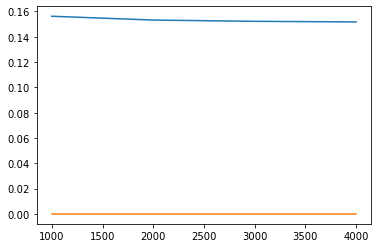

In [13]:
# check out what slope match looks like
plt.plot(x[1:], S_sc1)
plt.plot(x[1:], slope_array[1:])

### Special Case 2: Unlimited sediment, with abrasion, dzdt = 0

In [32]:
z_sc2 = np.linspace(1, 0, len(x)) # need to start with slight bedrock slope
beta = 0.00004 # abrasion factor

In [33]:
# define a fxn for sc2, dzdt = 0

def sc2(dx, x, z, U, phi, kqs, I, r, kxb, Pxb, beta, B, Q, num_steps=7000000):
    
    # set timestep
    dt = (0.5 * dx * dx / (kqs*Q[-1]))
    
    # create arrays
    Qs = np.zeros(len(x))
    E = np.zeros(len(x))
    dzdt = np.zeros(len(x))
    
    # set boundary conditions
    Qs[0] = 0
    #E[-1] = 0
    dzdt[-1] = 0

    for i in range(num_steps):
    
        # calculate slope
        S = np.abs(np.diff(z)/dx)
    
        # calculate sediment transport
        ##Qs[1:] = kqs * I * Q[1:] * S**(7./6.)
        Qs[1:] = kqs * I * Q[1:] * S**(7./6.)
    
        # erosion
        # "old" indexing from [:-1]
        E[:-1] = (1/((1-phi)*B[:-1])) * ((np.diff(Qs)/dx) + (beta * Qs[1:]))
    
        # calculate rate of elevation change
        # "old" indexing of E from [:-1]
        dzdt[:-1] = U - E[:-1]
    
        # update profile
        z += dzdt * dt
    
    return (S, Qs, E, dzdt, z, dt)

In [34]:
# and design a test

sc2_test = [dx, x, z_sc2, U, phi, kqs, I, r, kxb, Pxb, beta, B, Q]

# and run it
S_sc2, Qs_sc2, E_sc2, dzdt_sc2, model_z_sc2, dt_sc2 = sc2(*sc2_test)

In [35]:
# check to make sure we're at steady state
E_sc2

array([0.001, 0.001, 0.001, 0.001, 0.   ])

In [36]:
S_sc2

array([0.1510688 , 0.14597452, 0.14288585, 0.14033563])

In [37]:
# calc the slope with the analytical soln

slope_sc2_pred = ((U * B[1:] * x[1:] * (1 - phi))/(1 + (beta * x[1:])) * 1/(kqs*I*Q[1:]))**(6/7)
topo_sc2_pred = (-slope_sc2_pred * x[1:]) + model_z_sc2[0]

### Special Case 3: Sediment transport, grain attrition, bedrock erosion via abrasion but no plucking, dzdt = 0

Text(0.5, 1.0, 'Special Case 1: Unlimited sediment, with attrition')

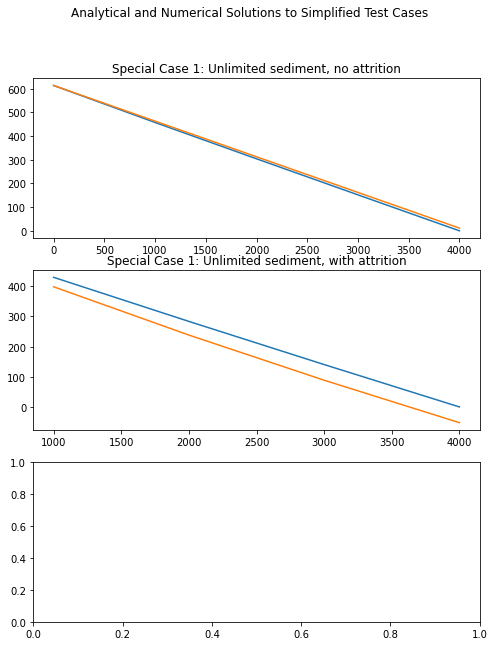

In [42]:
# now set up figure to make 3 subplots

fig, axs = plt.subplots(3, figsize = (8, 10))
fig.suptitle('Analytical and Numerical Solutions to Simplified Test Cases')

axs[0].plot(x, model_z_sc1)
axs[0].plot(x, topo_sc1_pred)
axs[0].set_title('Special Case 1: Unlimited sediment, no attrition')

axs[1].plot(x[1:], model_z_sc2[1:])
axs[1].plot(x[1:], topo_sc2_pred)
axs[1].set_title('Special Case 1: Unlimited sediment, with attrition')

In [39]:
slope_sc2_pred

array([0.18237571, 0.17113708, 0.16393423, 0.15808811])

In [40]:
S_sc2

array([0.1510688 , 0.14597452, 0.14288585, 0.14033563])

In [49]:
# now test the shape of a prediction for a new special case: with plucking, but without abrasion

r = 10
a = 25
u = 0.001
k = 0.00001
kqs = 0.041
i = 0.01
s0 = 0.15

slope_test = (6/ (5 * r * a * k * x[1:]**(1./5.))) * ((u / (kqs * i * s0)) + (u / x[1:]))

In [50]:
slope_test

array([1960.4968476 , 1706.71158254, 1573.77223675, 1485.77870672])

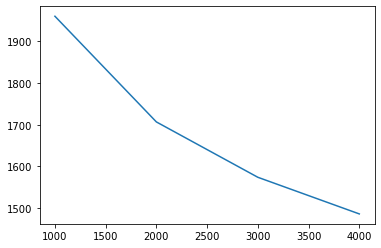

In [51]:
plt.plot(x[1:], slope_test)